In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
from datetime import timedelta

In [41]:
dir_path = '/home/shiva/Datasets/V2_01_easy/V2_01_easy/'

In [42]:
!ls $dir_path

copy_output_logs.sh	 mav0_office_NEW-working
home_office_3_400p	 mav0_office_working5
home_office_4_720p	 mav0_virtana_office_working_2
home_office_working_2	 mav0_virtana_office_working_3
ImuParams.yaml		 PARAMS_Custom
Kimera_VIO_Output	 PARAMS_Euroc
LeftCameraParams.yaml	 RightCameraParams.yaml
mav0			 Timestamp_Checks_Manipulation.ipynb
mav0_euroc		 virtana_office_working_1
mav0_office_new_working


In [73]:
dir_name = 'mav0'

In [74]:
num_rows_to_skip = 0

In [75]:
imu_df = pd.read_csv(f'{dir_path}{dir_name}/imu0/data.csv',skiprows=[1, num_rows_to_skip+1])
cam_df = pd.read_csv(f'{dir_path}{dir_name}/cam0/data.csv',skiprows=[1, num_rows_to_skip+1])

In [76]:
imu_df.head(5)

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1413393212230760448,0.058643,0.035605,0.051662,9.422556,1.160454,-2.623279
1,1413393212235760384,-0.011170,0.027925,0.069813,9.398040,1.618097,-2.705001
2,1413393212240760576,-0.072606,0.033510,0.069813,9.496106,0.670121,-2.819412
3,1413393212245760512,-0.092153,0.036303,0.078889,8.989429,-0.130755,-2.713173
4,1413393212250760448,-0.058643,0.024435,0.100531,9.177390,-0.890771,-2.582418


In [77]:
imu_df.shape

(22799, 7)

In [78]:
cam_df.head(5)

,#timestamp [ns],filename
0,1413393212305760512,1413393212305760512.png
1,1413393212355760384,1413393212355760384.png
2,1413393212405760512,1413393212405760512.png
3,1413393212455760384,1413393212455760384.png
4,1413393212505760512,1413393212505760512.png


In [79]:
cam_df.shape

(2279, 2)

### Checking Timestamp Matches from Cam to IMU

In [71]:
exists = []
for cam_ts in cam_df['#timestamp [ns]'].values:
    if cam_ts in imu_df['#timestamp [ns]'].values:
        exists.append(1)
    else:
        exists.append(0)

In [72]:
sum(exists)

1139

### Checking Deltas - IMU

In [11]:
imu_df['#timestamp [ns]']

0        1413393212475760384
1        1413393212485760512
2        1413393212495760384
3        1413393212505760512
4        1413393212515760384
                ...         
11370    1413393326175760384
11371    1413393326185760512
11372    1413393326195760384
11373    1413393326205760512
11374    1413393326215760384
Name: #timestamp [ns], Length: 11375, dtype: int64

In [12]:
deltas = pd.to_datetime(imu_df['#timestamp [ns]']).diff() / np.timedelta64(1000000, 'ns')

In [13]:
deltas

0              NaN
1        10.000128
2         9.999872
3        10.000128
4         9.999872
           ...    
11370     9.999872
11371    10.000128
11372     9.999872
11373    10.000128
11374     9.999872
Name: #timestamp [ns], Length: 11375, dtype: float64

In [14]:
delta_df = pd.DataFrame({'Timestamp': imu_df['#timestamp [ns]'], 'Delta':deltas})

In [15]:
delta_df.head(10)

,Timestamp,Delta
0,1413393212475760384,NaN
1,1413393212485760512,10.000128
2,1413393212495760384,9.999872
3,1413393212505760512,10.000128
4,1413393212515760384,9.999872
5,1413393212525760512,10.000128
6,1413393212535760384,9.999872
7,1413393212545760512,10.000128
8,1413393212555760384,9.999872
9,1413393212565760512,10.000128


In [16]:
delta_df['Delta'].value_counts()

Delta
10.000128    5687
9.999872     5687
Name: count, dtype: int64

In [17]:
delta_df['Delta'].describe()

count    11374.000000
mean        10.000000
std          0.000128
min          9.999872
25%          9.999872
50%         10.000000
75%         10.000128
max         10.000128
Name: Delta, dtype: float64

In [18]:
sns.set_theme(rc={'figure.figsize':(15,7)})

[Text(0.5, 0, 'Timestamp - UTC'), Text(0, 0.5, 'Delta (in milliseconds)')]

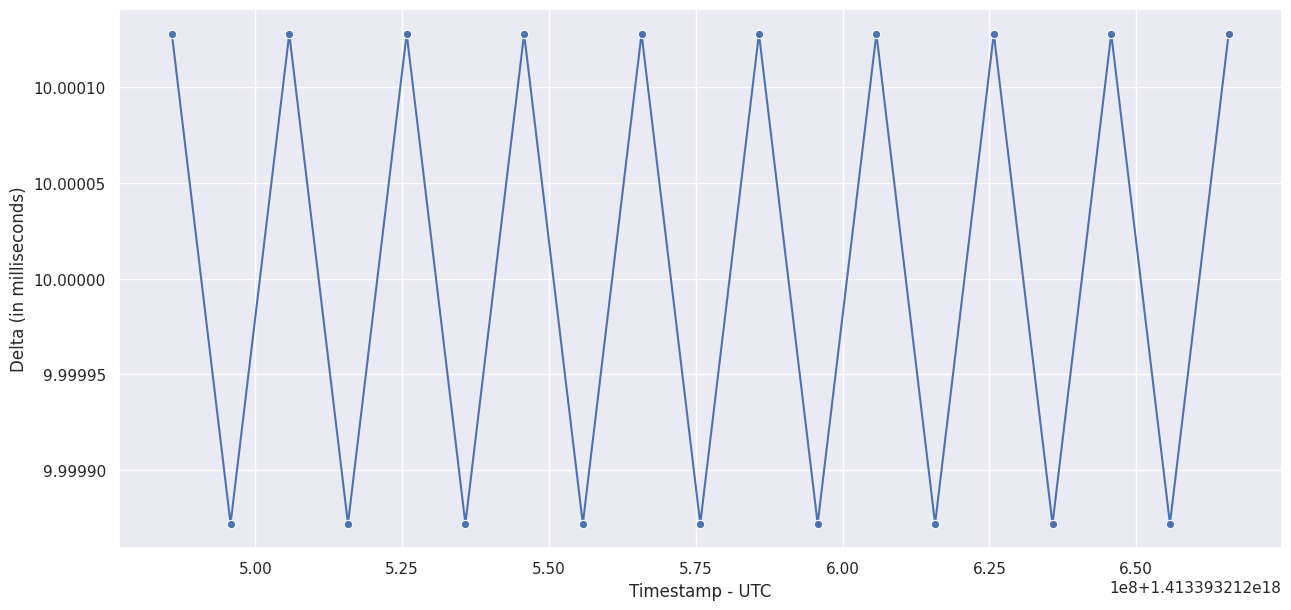

In [19]:
ax = sns.lineplot(data=delta_df[0:20], x="Timestamp", y="Delta", marker="o")
# ax.set(ylim=(7.0, 15.0))
ax.ticklabel_format(style='sci', axis='y', useOffset=False)
ax.set(xlabel='Timestamp - UTC', ylabel='Delta (in milliseconds)')

In [20]:
delta_df['Delta'].value_counts()

Delta
10.000128    5687
9.999872     5687
Name: count, dtype: int64

### Checking Deltas - CAM

In [21]:
cam_df['#timestamp [ns]']

0       1413393212355760384
1       1413393212455760384
2       1413393212555760384
3       1413393212655760384
4       1413393212755760384
               ...         
1134    1413393325755760384
1135    1413393325855760384
1136    1413393325955760384
1137    1413393326055760384
1138    1413393326155760384
Name: #timestamp [ns], Length: 1139, dtype: int64

In [22]:
deltas = pd.to_datetime(cam_df['#timestamp [ns]']).diff() / np.timedelta64(1000000, 'ns')

In [23]:
delta_df = pd.DataFrame({'Timestamp': cam_df['#timestamp [ns]'], 'Delta':deltas})

In [24]:
delta_df.head(10)

,Timestamp,Delta
0,1413393212355760384,NaN
1,1413393212455760384,100.0
2,1413393212555760384,100.0
3,1413393212655760384,100.0
4,1413393212755760384,100.0
5,1413393212855760384,100.0
6,1413393212955760384,100.0
7,1413393213055760384,100.0
8,1413393213155760384,100.0
9,1413393213255760384,100.0


In [25]:
delta_df['Delta'].value_counts()

Delta
100.0    1138
Name: count, dtype: int64

In [26]:
delta_df['Delta'].describe()

count    1138.0
mean      100.0
std         0.0
min       100.0
25%       100.0
50%       100.0
75%       100.0
max       100.0
Name: Delta, dtype: float64

[Text(0.5, 0, 'Timestamp - UTC'), Text(0, 0.5, 'Delta (in milliseconds)')]

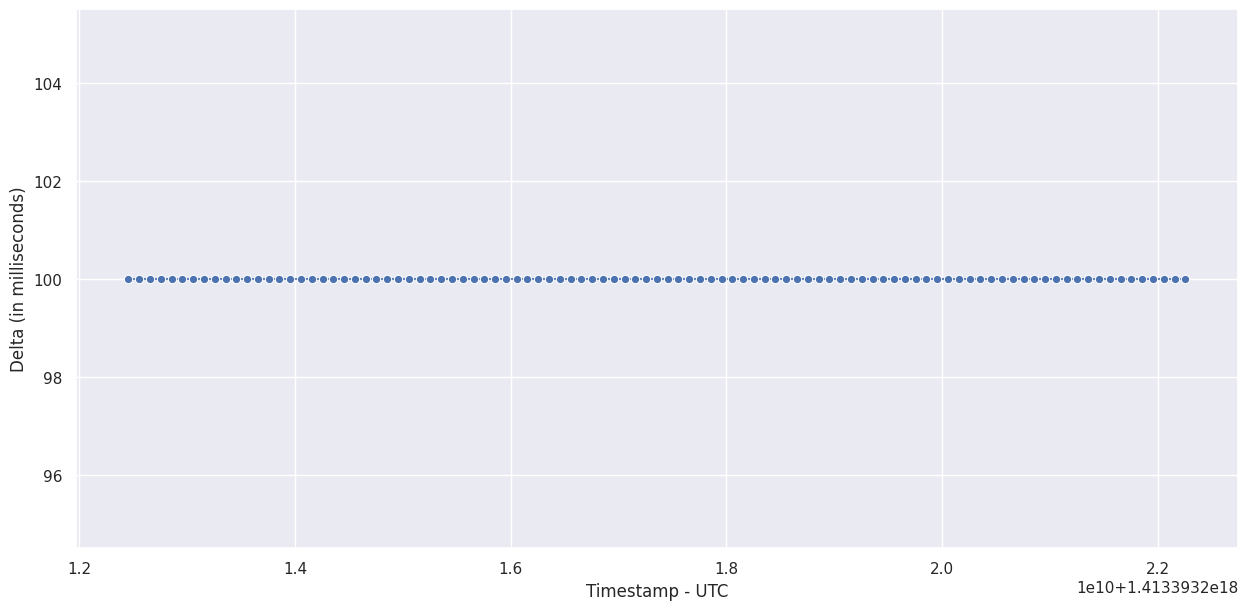

In [27]:
ax = sns.lineplot(data=delta_df[0:100], x="Timestamp", y="Delta", marker="o")
# ax.set(ylim=(4.999900, 5.000200))
ax.ticklabel_format(style='sci', axis='y', useOffset=False)
ax.set(xlabel='Timestamp - UTC', ylabel='Delta (in milliseconds)')

[Text(0.5, 0, 'Timestamp - UTC'), Text(0, 0.5, 'Delta (in milliseconds)')]

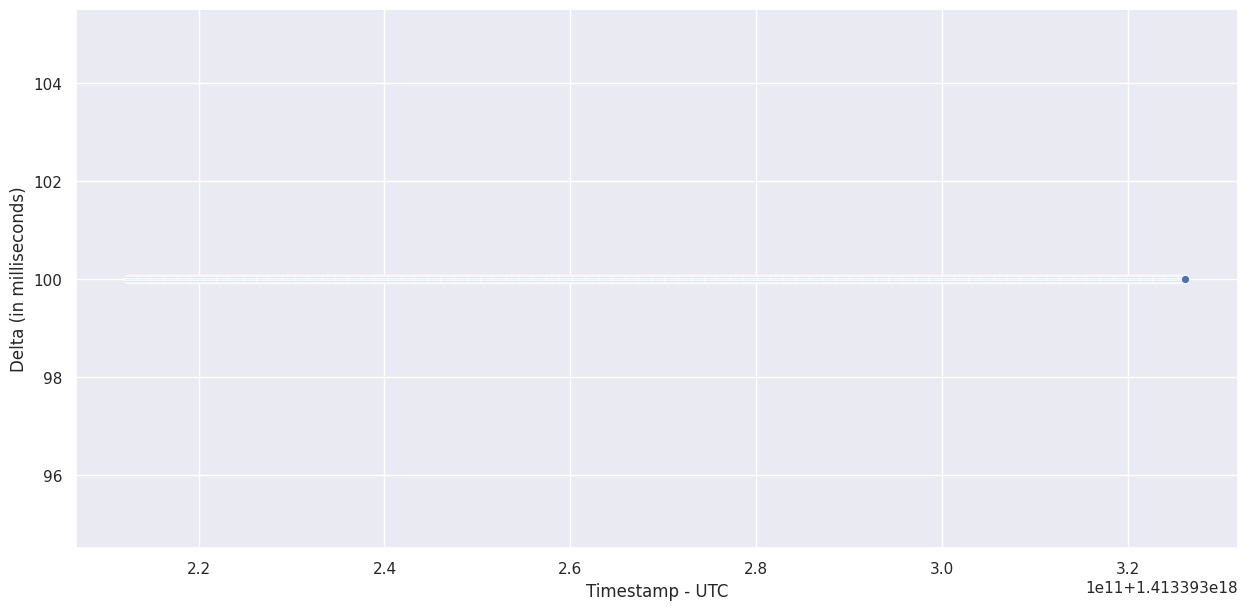

In [28]:
ax = sns.lineplot(data=delta_df[delta_df['Delta'] <= 251], x="Timestamp", y="Delta", marker="o")
# ax.set(ylim=(4.999900, 5.000200))
ax.ticklabel_format(style='sci', axis='y', useOffset=False)
ax.set(xlabel='Timestamp - UTC', ylabel='Delta (in milliseconds)')

In [77]:
from datetime import datetime, timedelta

to_convert = '0 days 10:49:49.470036'

# printing initial_date
print(pd.Timedelta(to_convert).seconds / 1000000000)

3.8989e-05


In [71]:
pd.to_datetime(ini_time_for_now)

Timestamp('2024-09-13 13:48:17.037153')